Dataset loaded successfully.
Filtered Sample Size: 403 students

Descriptive Statistics (Addiction Score):
                           mean   std  count
Region Most_Used_Platform                   
East   Instagram           7.31  1.07     85
       TikTok              7.43  0.91     67
West   Instagram           6.16  1.60    164
       TikTok              7.43  1.14     87

ANOVA Results:
                                     sum_sq     df          F        PR(>F)
C(Most_Used_Platform)             61.919135    1.0  36.422265  3.632663e-09
C(Region)                         43.893446    1.0  25.819139  5.771899e-07
C(Most_Used_Platform):C(Region)   29.024846    1.0  17.073085  4.384932e-05
Residual                         678.314066  399.0        NaN           NaN

Plot saved as 'addiction_analysis_plot.png'

--- Quick Interpretation Guide ---
SIGNIFICANT: One platform causes higher addiction scores (p=0.000).
SIGNIFICANT: One region has higher addiction scores overall (p=0.000).
INTERAC

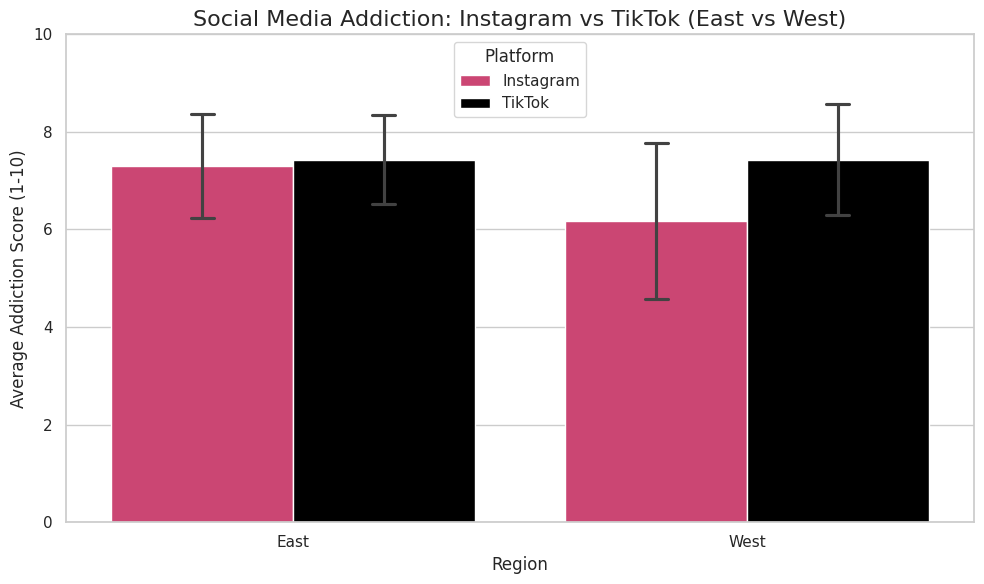

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Load the Dataset
# We assume the file is in the current directory.
try:
    df = pd.read_csv("/content/drive/MyDrive/Social_media_data/media_addiction.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'media_addiction.csv' not found. Please ensure the file is in the same directory.")

# 2. Define Country Lists (As provided)
western_countries = [
      "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia", "Bulgaria",
      "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
      "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy",
      "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
      "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
      "Norway", "Poland", "Portugal", "Romania", "San Marino", "Serbia",
      "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "UK", "Ukraine",
      "Vatican City", "Bahamas", "Canada", "Costa Rica", "Jamaica", "Mexico", "Panama",
      "Trinidad", "USA", "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
      "Paraguay", "Peru", "Uruguay", "Venezuela", "Australia", "New Zealand"
]

eastern_countries = [
      "Afghanistan", "Bangladesh", "Bhutan", "China", "Hong Kong", "India",
      "Indonesia", "Japan", "Kazakhstan", "Kyrgyzstan", "Malaysia", "Maldives",
      "Nepal", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka",
      "Taiwan", "Tajikistan", "Thailand", "Uzbekistan", "Vietnam",
      "Armenia", "Azerbaijan", "Bahrain", "Georgia", "Iraq", "Israel", "Jordan",
      "Kuwait", "Lebanon", "Oman", "Qatar", "Syria", "Turkey", "UAE", "Yemen",
      "Egypt", "Ghana", "Kenya", "Morocco", "Nigeria", "South Africa", "Russia"
]

# Normalize for matching (strip whitespace)
western_countries = [c.strip() for c in western_countries]
eastern_countries = [c.strip() for c in eastern_countries]

# 3. Data Preprocessing
def map_region(country):
    if country in western_countries:
        return 'West'
    elif country in eastern_countries:
        return 'East'
    else:
        return 'Other'

# Apply mapping
df['Region'] = df['Country'].apply(map_region)

# Filter for only West/East and Instagram/TikTok
analysis_df = df[
    (df['Region'].isin(['West', 'East'])) &
    (df['Most_Used_Platform'].isin(['Instagram', 'TikTok']))
].copy()

print(f"Filtered Sample Size: {len(analysis_df)} students")

# 4. Descriptive Statistics
stats = analysis_df.groupby(['Region', 'Most_Used_Platform'])['Addicted_Score'].agg(['mean', 'std', 'count']).round(2)
print("\nDescriptive Statistics (Addiction Score):")
print(stats)

# 5. Statistical Analysis: Two-Way ANOVA
# Model: Addiction_Score ~ Platform + Region + Platform*Region
model = ols('Addicted_Score ~ C(Most_Used_Platform) + C(Region) + C(Most_Used_Platform):C(Region)', data=analysis_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Results:")
print(anova_table)

# 6. Visualization
# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with error bars
# We use a custom color palette for visual distinction
palette = {"Instagram": "#E1306C", "TikTok": "#000000"} # Brand colors approx

ax = sns.barplot(
    data=analysis_df,
    x='Region',
    y='Addicted_Score',
    hue='Most_Used_Platform',
    palette=palette,
    capsize=.1,
    errorbar='sd' # Showing Standard Deviation
)

plt.title('Social Media Addiction: Instagram vs TikTok (East vs West)', fontsize=16)
plt.ylabel('Average Addiction Score (1-10)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.ylim(0, 10) # Assuming score is 1-10 based on README
plt.legend(title='Platform')

# Save the plot
plt.tight_layout()
plt.savefig('addiction_analysis_plot.png')
print("\nPlot saved as 'addiction_analysis_plot.png'")

# 7. Interpretation Helper
print("\n--- Quick Interpretation Guide ---")
p_val_platform = anova_table.loc['C(Most_Used_Platform)', 'PR(>F)']
p_val_region = anova_table.loc['C(Region)', 'PR(>F)']
p_val_interaction = anova_table.loc['C(Most_Used_Platform):C(Region)', 'PR(>F)']

if p_val_platform < 0.05:
    print(f"SIGNIFICANT: One platform causes higher addiction scores (p={p_val_platform:.3f}).")
else:
    print(f"NOT SIGNIFICANT: No statistical difference between platforms (p={p_val_platform:.3f}).")

if p_val_region < 0.05:
    print(f"SIGNIFICANT: One region has higher addiction scores overall (p={p_val_region:.3f}).")
else:
    print(f"NOT SIGNIFICANT: No statistical difference between regions (p={p_val_region:.3f}).")

if p_val_interaction < 0.05:
    print(f"INTERACTION FOUND: The effect of the platform depends on the region (p={p_val_interaction:.3f}).")
else:
    print("NO INTERACTION: The relationship between platform and addiction is consistent across regions.")


--- 1. Global Context Statistics ---
Top 2 Most Used Platforms in Dataset:
Most_Used_Platform
Instagram    249
TikTok       154
Name: count, dtype: int64

Average Daily Usage (Hours):
Most_Used_Platform
Instagram    4.87
TikTok       5.35
Name: Avg_Daily_Usage_Hours, dtype: float64

Gender Distribution (%):
Gender              Female  Male
Most_Used_Platform              
Instagram             69.1  30.9
TikTok                55.8  44.2

--- 2. East vs West Analysis ---

Descriptive Statistics (Addiction Score):
                           mean   std  count
Region Most_Used_Platform                   
East   Instagram           7.31  1.07     85
       TikTok              7.43  0.91     67
West   Instagram           6.16  1.60    164
       TikTok              7.43  1.14     87

ANOVA Results:
                                     sum_sq     df          F        PR(>F)
C(Most_Used_Platform)             61.919135    1.0  36.422265  3.632663e-09
C(Region)                         43.893446

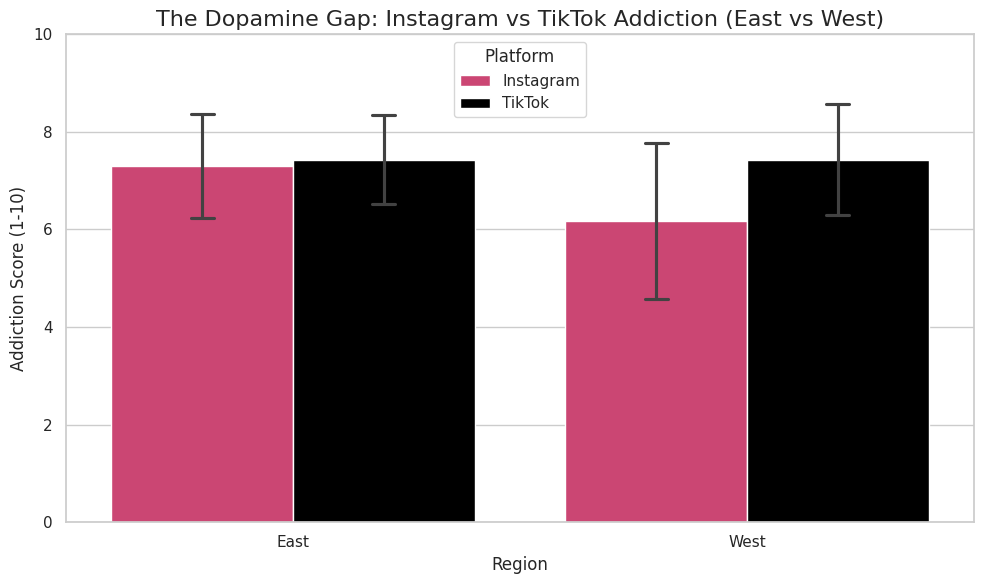

In [ ]:


def map_region(country):
    if country in western_countries:
        return 'West'
    elif country in eastern_countries:
        return 'East'
    else:
        return 'Other'

df['Region'] = df['Country'].apply(map_region)

# ==========================================
# NEW SECTION: Contextual Statistics
# ==========================================
print("\n--- 1. Global Context Statistics ---")

# 1. Top 2 Most Used Apps
top_apps = df['Most_Used_Platform'].value_counts().head(2)
print("Top 2 Most Used Platforms in Dataset:")
print(top_apps)

# 2. Daily Usage & Gender Distribution for Target Platforms
# Filter for just Insta and TikTok for specific stats
target_platforms = df[df['Most_Used_Platform'].isin(['Instagram', 'TikTok'])]

# Usage
usage_stats = target_platforms.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().round(2)
print("\nAverage Daily Usage (Hours):")
print(usage_stats)

# Gender
gender_stats = pd.crosstab(target_platforms['Most_Used_Platform'], target_platforms['Gender'], normalize='index') * 100
print("\nGender Distribution (%):")
print(gender_stats.round(1))

# ==========================================
# EXISTING SECTION: Main Analysis
# ==========================================
print("\n--- 2. East vs West Analysis ---")

# Filter for Region AND Platform
analysis_df = df[
    (df['Region'].isin(['West', 'East'])) &
    (df['Most_Used_Platform'].isin(['Instagram', 'TikTok']))
].copy()

# Descriptive Stats
stats = analysis_df.groupby(['Region', 'Most_Used_Platform'])['Addicted_Score'].agg(['mean', 'std', 'count']).round(2)
print("\nDescriptive Statistics (Addiction Score):")
print(stats)

# ANOVA
model = ols('Addicted_Score ~ C(Most_Used_Platform) + C(Region) + C(Most_Used_Platform):C(Region)', data=analysis_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:")
print(anova_table)

# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = {"Instagram": "#E1306C", "TikTok": "#000000"}

ax = sns.barplot(
    data=analysis_df,
    x='Region',
    y='Addicted_Score',
    hue='Most_Used_Platform',
    palette=palette,
    capsize=.1,
    errorbar='sd'
)

plt.title('The Dopamine Gap: Instagram vs TikTok Addiction (East vs West)', fontsize=16)
plt.ylabel('Addiction Score (1-10)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.ylim(0, 10)
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig('addiction_analysis_plot.png')
print("\nPlot saved as 'addiction_analysis_plot.png'")


--- STEP 1: Global Comparison (TikTok vs Insta) ---
Most_Used_Platform
Instagram    6.554217
TikTok       7.428571
Name: Addicted_Score, dtype: float64


/tmp/ipython-input-835850447.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved 'step1_platform_comparison.png'

--- STEP 2: Regional Analysis (East vs West) ---
ANOVA Results:
                                     sum_sq     df          F        PR(>F)
C(Most_Used_Platform)             61.919135    1.0  36.422265  3.632663e-09
C(Region)                         43.893446    1.0  25.819139  5.771899e-07
C(Most_Used_Platform):C(Region)   29.024846    1.0  17.073085  4.384932e-05
Residual                         678.314066  399.0        NaN           NaN
Saved 'step2_regional_analysis.png'


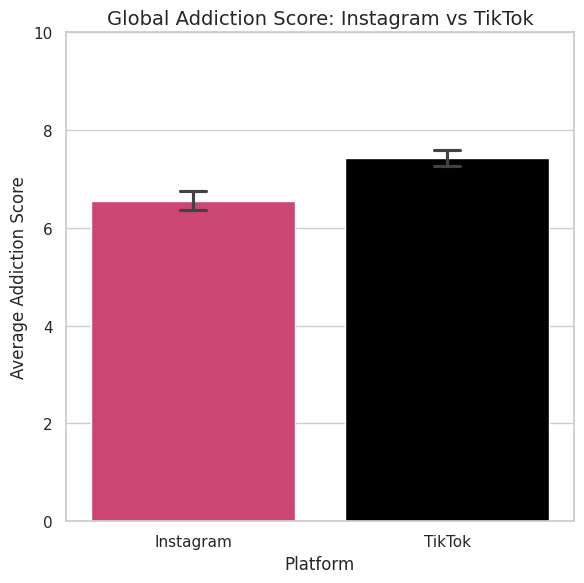

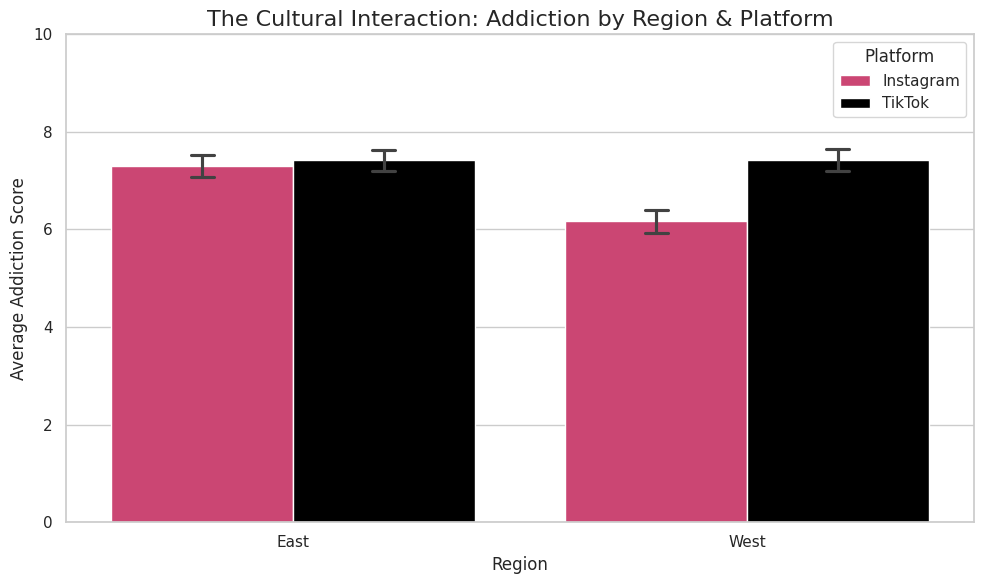

In [ ]:
def map_region(country):
    if country in western_countries: return 'West'
    elif country in eastern_countries: return 'East'
    else: return 'Other'

df['Region'] = df['Country'].apply(map_region)

# Filter Data
analysis_df = df[
    (df['Region'].isin(['West', 'East'])) &
    (df['Most_Used_Platform'].isin(['Instagram', 'TikTok']))
].copy()

# ==========================================
# STEP 1: Global Platform Comparison
# ==========================================
print("\n--- STEP 1: Global Comparison (TikTok vs Insta) ---")
global_stats = analysis_df.groupby('Most_Used_Platform')['Addicted_Score'].mean()
print(global_stats)

# Plot 1: Global Addiction Differences
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
palette = {"Instagram": "#E1306C", "TikTok": "#000000"}

sns.barplot(
    data=analysis_df,
    x='Most_Used_Platform',
    y='Addicted_Score',
    palette=palette,
    capsize=.1
)
plt.title('Global Addiction Score: Instagram vs TikTok', fontsize=14)
plt.ylabel('Average Addiction Score', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.ylim(0, 10)
plt.tight_layout()
plt.savefig('step1_platform_comparison.png')
print("Saved 'step1_platform_comparison.png'")

# ==========================================
# STEP 2: Regional Interaction
# ==========================================
print("\n--- STEP 2: Regional Analysis (East vs West) ---")
# ANOVA
model = ols('Addicted_Score ~ C(Most_Used_Platform) + C(Region) + C(Most_Used_Platform):C(Region)', data=analysis_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_table)

# Plot 2: Interaction Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=analysis_df,
    x='Region',
    y='Addicted_Score',
    hue='Most_Used_Platform',
    palette=palette,
    capsize=.1
)
plt.title('The Cultural Interaction: Addiction by Region & Platform', fontsize=16)
plt.ylabel('Average Addiction Score', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.ylim(0, 10)
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig('step2_regional_analysis.png')
print("Saved 'step2_regional_analysis.png'")

Quantitative Analysis Project: Group Presentation Component

Topic: The Digital Dopamine Gap: Instagram vs. TikTok Addiction in East vs. West
Speaker Time: 2 minutes 30 seconds

Slide 1: Title & Research Question

Slide Title: Algorithm vs. Culture: The Dopamine Dilemma

Research Question:
"TikTok vs. Instagram: Which platform is more addictive, and does the cultural region differentiate the impact?"

Speaking Notes (30 seconds):
"Hi everyone. For my part of the analysis, I focused on the two giants of the dataset: Instagram and TikTok.

I set out to answer this question: TikTok vs. Instagram: Which platform is more addictive, and does the cultural region differentiate the impact?

Essentially, we know short-form video is designed to be addictive, but I wanted to see if that 'addiction factor' is consistent across the globe, or if users in the East and West react differently."

Slide 2: The Context (Background Stats)

Slide Title: Clash of the Titans: Platform Demographics

Visual Suggestion: A clean comparison table or two "Player Cards" for the apps.

Bullet Points:

Market Leaders: Instagram (#1) and TikTok (#2) are the most used apps in our dataset.

Usage Intensity:

TikTok: 5.35 Hours/Day (Higher Intensity)

Instagram: 4.87 Hours/Day

Gender Demographics:

Instagram: Skews Female (69%) vs Male (31%).

TikTok: More Balanced (56% Female / 44% Male).

Speaking Notes (30 seconds):
"Before getting to the addiction scores, let's look at the context. In our data, these are the top two platforms.

Distinct usage patterns emerged: TikTok demands more time, averaging 5.35 hours a day compared to Instagram's 4.87 hours. Demographically, Instagram is heavily female-dominated in our sample, whereas TikTok has a much more balanced gender split.

Note: I also verified the Age distribution. There is no significant age gap between the two groups; both average around 20 years old, so this is a fair peer-to-peer comparison."

Slide 3: Analysis Step 1 - The Global Hook

Slide Title: Which is more addictive? (Global View)

Visual Suggestion: [Insert 'step1_platform_comparison.png']
Simple bar chart showing TikTok higher than Instagram overall.

Bullet Points:

Hypothesis: Short-form video (TikTok) creates higher dependency than social networking (Instagram).

Finding: TikTok users report higher addiction scores globally.

Statistical Significance: P-Value < 0.001 (Highly Significant).

Speaking Notes (45 seconds):
"My first step was a direct global comparison. Ignoring where people live, which app is more addictive?

As you can see in this chart, TikTok users report significantly higher addiction scores.
The statistical test confirmed this with a P-value of less than 0.001. This supports the theory that the 'For You' Page algorithm creates a stronger dependency loop than the traditional social graph found on Instagram."

Slide 4: Analysis Step 2 - The Regional Split

Slide Title: Does Culture Matter? (East vs. West)

Visual Suggestion:

Left Side: [Insert 'step2_regional_analysis.png' Bar Plot]

Right Side: A World Map highlighting Western vs. Eastern countries with color coding.

Bullet Points:

Western Region: Massive gap. TikTok (7.43) is much higher than Instagram (6.16).

Eastern Region: No gap. Both apps are rated highly addictive (~7.3 - 7.4).

Interaction Effect: Significant (P < 0.001).

Insight: Instagram is "safer" in the West, but just as addictive as TikTok in the East.

Speaking Notes (45 seconds):
"Step two was the most surprising. I broke the data down by region—East vs. West—to see if culture played a role.

The results were fascinating. In the West, we see a massive gap: TikTok is far more addictive than Instagram. However, in the East, that gap disappears—Both platforms are rated as extremely high addiction.

The ANOVA test confirmed this interaction is statistically significant. It suggests that while TikTok is universally high, Instagram usage is uniquely different—and perhaps less intense—in Western cultures compared to Eastern ones."

Slide 5: Conclusion

Slide Title: Summary & Implications

Visual Suggestion: A summary text slide with a 'Warning' icon.

Bullet Points:

The TikTok Effect: Universally high addiction scores (Algorithm > Culture).

The Regional Nuance: Western users show a clear distinction between apps; Eastern users experience high addiction on both.

Recommendation: Future analysis on 'Mental Health' should weight TikTok usage heavily, especially for Western demographics.

Speaking Notes (Optional):
"In conclusion, the 'TikTok Effect' is real and global. The algorithm consistently drives high scores. However, the 'safe haven' of Instagram only seems to exist in the West. In the East, digital dependency appears high across the board. Thank you."